In [1]:
import numpy as np
import qiskit.quantum_info as qi
from math import *
import scipy
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import MCMT

In [2]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import QFT,RYGate
from qiskit.quantum_info import random_statevector
from qiskit.opflow import X,Y,Z,I,CX
from math import sqrt
pi = np.pi
sin = np.sin
cos = np.cos
exp = np.exp

In [3]:
import matplotlib.pyplot as plt

# Definitions

In [4]:
#Operator to gate convertor
def qc(operator):
    qubit_list = list(range(int(np.log(len(operator))/np.log(2))))
    qc = QuantumCircuit(len(qubit_list))
    qc.unitary(operator,qubit_list)
    return qc

In [5]:
# will help to obtain the parameters for formation of B gate
#t here is len(betas-1), in this scheme
def theta_computer(betas):
    t = len(betas)-1
    A = sum(betas)
    alphas = np.sqrt(np.array(betas)/A)
    thetas = []
    for i in range(t):
        if i == 0 :
            thetas.append(acos(alphas[i]))
        else:
            fac = 0
            j = 0
            while j<i :
                fac+=alphas[j]**2
                j+=1
            thetas.append(acos(alphas[i]/np.sqrt(1-fac)))
    return thetas,A

In [6]:
#create gate
def negate(circ,neg = True):
    op = qi.Operator(circ)
    if neg == True:
        op = -op.data
    else:
        op = op.data
    return op

In [7]:
simulator = Aer.get_backend('statevector_simulator')
qasm = Aer.get_backend('qasm_simulator')

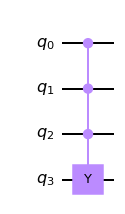

In [8]:
ccz = MCMT('cz',2,1)
ccx = MCMT('cx',2,1)
ccy = MCMT('cy',2,1)  
cccx = MCMT('cx',3,1)
cccy = MCMT('cy',3,1)
cccz = MCMT('cz',3,1)
cccxx = MCMT('cx',3,2)
cccyy = MCMT('cy',3,2)
cccy.draw('mpl')

# Hamiltonians (EFT)

## JWT

### for N = 2, JWT 

In [49]:
H2_op = (5.906709 * I ^ I) + \
       (0.218291 * I ^ Z) - \
       (6.125 * Z ^ I) - \
       (2.143304 * X ^ X) - \
       (2.143304 * Y ^ Y)
# H2_op = (0.218291 * Z ^ I) - \
#         (6.125 * I ^ Z) - \
#         (2.143304 * X ^ X) - \
#         (2.143304 * Y ^ Y)
#ingoring the identity part that we will add at the end
e_jw2,v_jw2 = np.linalg.eig(H2_op.to_matrix())
v_jw2 = np.transpose(v_jw2)
e_jw2,v_jw2[0]

(array([13.56257922+0.j, -1.74916122+0.j,  0.        +0.j, 11.813418  +0.j]),
 array([-0.        -0.j, -0.29278612-0.j,  0.95617796+0.j, -0.        -0.j]))

In [50]:
(I^Z).to_matrix()

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [51]:
zi = QuantumCircuit(2)
zi.z(0)
negate(zi,neg = False)

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [52]:
betas_jw2 = [5.906709,0.218291,6.125,2.143304,2.143304]
thetas_jw2, A_jw2 =theta_computer(betas_jw2)

In [53]:
#my comment -- if zi is taking then order is z0i1 and iz then i0z1 other order is z1i0 but this is reverse order and can be used if general and qiskit ordering is not considered
# but for moment going with the same ordering

ii = QuantumCircuit(2)
ii.i([1,0])
II = qc(negate(ii,neg = False)).to_gate(label = 'II').control(num_ctrl_qubits=3,ctrl_state=0)
zi = QuantumCircuit(2)
zi.z(0)
ZI = qc(negate(zi,neg = False)).to_gate(label = 'ZI').control(num_ctrl_qubits=3,ctrl_state=1)
iz = QuantumCircuit(2)
iz.z(1)
IZ_ = qc(negate(iz)).to_gate(label = 'IZ_').control(num_ctrl_qubits=3,ctrl_state=2)
xx = QuantumCircuit(2)
xx.x([0,1])
XX_ = qc(negate(xx)).to_gate(label = 'XX_').control(num_ctrl_qubits=3,ctrl_state=3)
yy = QuantumCircuit(2)
yy.y([0,1])
YY_ = qc(negate(yy)).to_gate(label = 'YY_').control(num_ctrl_qubits=3,ctrl_state=4)


[0.        +0.j 0.91427629+0.j 0.08572371+0.j 0.        +0.j]


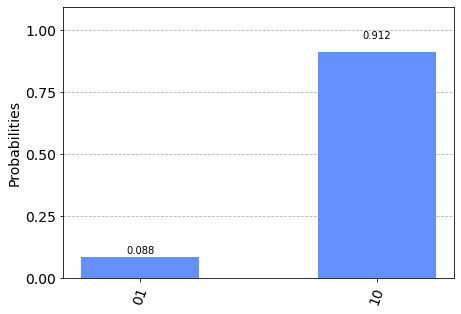

In [54]:
# my varification of intitial state
temp1 = QuantumCircuit(2,2)
#temp1.initialize(v[0],[0,1])
temp1.ry(2.547304378732438,1)
temp1.x(0)
temp1.cx(1,0)


print(v_jw2[1]**2)
shots = 10000
#svsim = Aer.get_backend('aer_simulator')

#temp1.save_statevector()   # Tell simulator to save statevector
#qobj1 = assemble(temp1)     # Create a Qobj from the circuit for the simulator to run
#result1 = svsim.run(qobj1).result()
#out_state = result1.get_statevector()
#print(out_state) # Display the output state vector

temp1.measure([0,1],[0,1])
result = execute(temp1, backend = simulator, shots = shots).result()
count = result.get_counts(temp1)
#t_qpe = transpile(qpe, sim)
#qobj = assemble(t_qpe, shots=shots)
#result = sim.run(qobj).result()
#count = result.get_counts()
plot_histogram(count)

In [55]:
ccry = RYGate(2*thetas_jw2[3]).control(2)

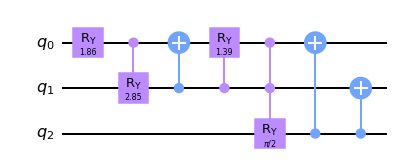

In [56]:
#Qauntum Circuit for V_gate and V_dag
V_cir_jw2 = QuantumCircuit(3)
V_cir_jw2.ry(2*thetas_jw2[0],0)
V_cir_jw2.cry(2*thetas_jw2[1],0,1)
V_cir_jw2.cx(1,0)
V_cir_jw2.cry(2*thetas_jw2[2],1,0)
V_cir_jw2.append(ccry,[0,1,2])
V_cir_jw2.cx(2,0)
V_cir_jw2.cx(2,1)
V_dag_jw2 = V_cir_jw2.inverse()
V_cir_jw2.draw('mpl')

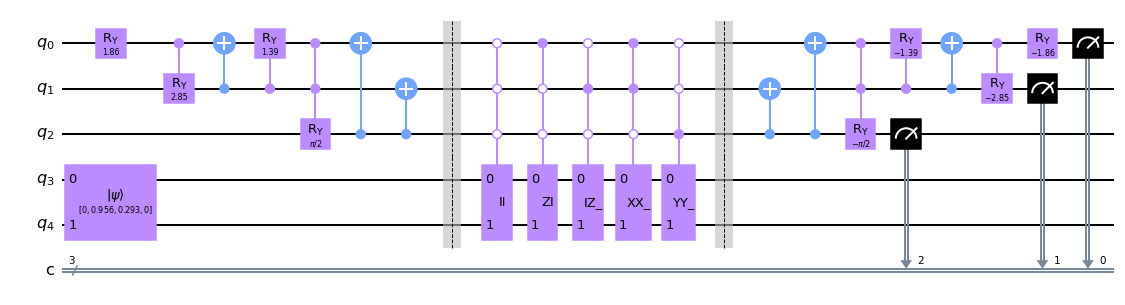

In [57]:
H2_cir_jw2 = QuantumCircuit(5,3)
#state preparation
H2_cir_jw2.initialize(v_jw2[1],[3,4])
#H2_cir_jw2.ry(2.547304378732438,3)
#H2_cir_jw2.x(4)
#H2_cir_jw2.cx(3,4)
# V 
H2_cir_jw2.compose(V_cir_jw2,[0,1,2],inplace= True)
H2_cir_jw2.barrier()
#applying unitaries as sum
H2_cir_jw2.append(II,[0,1,2,3,4])
H2_cir_jw2.append(ZI,[0,1,2,3,4])
H2_cir_jw2.append(IZ_,[0,1,2,3,4])
H2_cir_jw2.append(XX_,[0,1,2,3,4])
H2_cir_jw2.append(YY_,[0,1,2,3,4])
H2_cir_jw2.barrier()
#V dagger
H2_cir_jw2.compose(V_dag_jw2,[0,1,2],inplace= True)
H2_cir_jw2.measure([0,1,2],[0,1,2])
H2_cir_jw2.draw('mpl')

In [58]:
shots_jw2 = 20000
E_jw2 = []
probs_jw2 = []
for i in range(5):
    result_jw2 = execute(H2_cir_jw2, backend = qasm, shots = shots_jw2).result()
    count_jw2 = result_jw2.get_counts(H2_cir_jw2)
    probs_jw2.append(count_jw2['000']/shots_jw2)
    E_jw2.append(-A_jw2*np.sqrt(count_jw2['000']/shots_jw2))
print('energy = ',E_jw2,'\n')

energy =  [-1.645371721235683, -1.7105600323749546, -1.7461593158197661, -1.7264725613770229, -1.8077167586601297] 

